# Frequency Prediction on LSTM model

## Resource Availability

In [1]:
# This all packages are necessary for running followong code
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense,Dropout
from matplotlib import pyplot as plt 
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import tensorflow as tf
import os
import sys
from tensorflow.keras.layers import *
from tensorflow.keras.layers import Conv1D,Flatten
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from Functions.supervised_functions import series_to_supervised,Windowed_df_to_X_y


                     Frequency
All Frequency Data            
2020-12-28 06:00:00  50.005859
2020-12-28 06:00:01  50.008789
2020-12-28 06:00:02  50.008789
2020-12-28 06:00:03  50.008789
2020-12-28 06:00:04  50.007812
...                        ...
2020-12-28 07:59:55  50.098633
2020-12-28 07:59:56  50.099609
2020-12-28 07:59:57  50.099609
2020-12-28 07:59:58  50.099609
2020-12-28 07:59:59  50.105469

[7200 rows x 1 columns]
                     Frequency
All Frequency Data            
2020-12-28 06:00:00   0.005859
2020-12-28 06:00:01   0.008789
2020-12-28 06:00:02   0.008789
2020-12-28 06:00:03   0.008789
2020-12-28 06:00:04   0.007812
...                        ...
2020-12-28 07:59:55   0.098633
2020-12-28 07:59:56   0.099609
2020-12-28 07:59:57   0.099609
2020-12-28 07:59:58   0.099609
2020-12-28 07:59:59   0.105469

[7200 rows x 1 columns]


<ipython-input-2-0f1e1b859cb5>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  olddf['Frequency']=olddf['Frequency']-50  #For scaling frequency values


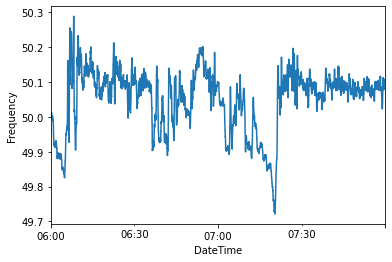

In [2]:
#-------------------------------------------------------------------
#please change appropriate path here for loading dataset into dataframe
full_df=pd.read_hdf('/Users/abhishekpanchal/Desktop/15_min_data/December2020_Ethiopia.h5')

olddf=full_df[2354400:2361600]  #by changing this value we can select size of dataframe 
newdf=full_df[2354400:2358000]  #used when creating final combined plot of train, test and predictions
testnewdf=full_df[2358000:2359200] #used when creating final combined plot of train, test and predictions

print(olddf)

#-------------------------------------------------------------------
#for plotting selected dataframe
olddf['Frequency'].plot() 
plt.xlabel('DateTime')
plt.ylabel('Frequency')

olddf['Frequency']=olddf['Frequency']-50  #For scaling frequency values 
print(olddf)




## Data preprocessing

In [3]:
#By changing value in below function window size is changed 
values=olddf
data = series_to_supervised(values, 300, 1)
print(data)

                     var1(t-300)  var1(t-299)  var1(t-298)  var1(t-297)  \
All Frequency Data                                                        
2020-12-28 06:05:00     0.005859     0.008789     0.008789     0.008789   
2020-12-28 06:05:01     0.008789     0.008789     0.008789     0.007812   
2020-12-28 06:05:02     0.008789     0.008789     0.007812     0.010742   
2020-12-28 06:05:03     0.008789     0.007812     0.010742     0.008789   
2020-12-28 06:05:04     0.007812     0.010742     0.008789     0.008789   
...                          ...          ...          ...          ...   
2020-12-28 07:59:55     0.054688     0.058594     0.058594     0.060547   
2020-12-28 07:59:56     0.058594     0.058594     0.060547     0.064453   
2020-12-28 07:59:57     0.058594     0.060547     0.064453     0.066406   
2020-12-28 07:59:58     0.060547     0.064453     0.066406     0.066406   
2020-12-28 07:59:59     0.064453     0.066406     0.066406     0.068359   

                     var

In [4]:
#Window dataframe to X and Y conversion
X,Y=Windowed_df_to_X_y(data)

[[ 0.00585938  0.00878906  0.00878906 ... -0.171875   -0.171875
  -0.171875  ]
 [ 0.00878906  0.00878906  0.00878906 ... -0.171875   -0.171875
  -0.17480469]
 [ 0.00878906  0.00878906  0.0078125  ... -0.171875   -0.17480469
  -0.17285156]
 ...
 [ 0.05859375  0.06054688  0.06445312 ...  0.09375     0.09863281
   0.09960938]
 [ 0.06054688  0.06445312  0.06640625 ...  0.09863281  0.09960938
   0.09960938]
 [ 0.06445312  0.06640625  0.06640625 ...  0.09960938  0.09960938
   0.09960938]]


In [6]:
#-------------------------------------------------------------------
#For splitting dataset into train and test by changing number of rows 
X_train,Y_train =X[0:3300],Y[0:3300]
#X_val,Y_val=X[1784:2677],Y[1784:2677] 
X_test,Y_test=X[3300:5100],Y[3300:5100]

## Machine learning algorithm selection

In [7]:
#-------------------------------------------------------------------
#Building LSTM model
model= Sequential()
model.add(LSTM(256,activation='relu',input_shape=(300,1),return_sequences=False))

model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________


In [8]:
#-------------------------------------------------------------------
#To mark check point where we get low validation loss during model training  
cp=ModelCheckpoint('model/',save_best_only=True)
model.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate=0.001))

In [9]:
#-------------------------------------------------------------------
#fitting the model
history=model.fit(X_train,Y_train,batch_size=32,validation_split=0.1,epochs=20,callbacks=[cp],verbose=1)

Epoch 1/20
93/93 [==============================] - 26s 271ms/step - loss: 8.6834e-04 - val_loss: 2.3987e-04
Epoch 2/20
93/93 [==============================] - 26s 275ms/step - loss: 2.6847e-04 - val_loss: 1.3158e-04
Epoch 3/20
93/93 [==============================] - 26s 279ms/step - loss: 1.7836e-04 - val_loss: 8.0420e-05
Epoch 4/20
93/93 [==============================] - 27s 288ms/step - loss: 1.3086e-04 - val_loss: 6.3063e-05
Epoch 5/20
93/93 [==============================] - 33s 349ms/step - loss: 1.1933e-04 - val_loss: 6.4469e-05
Epoch 6/20
93/93 [==============================] - 27s 284ms/step - loss: 1.1787e-04 - val_loss: 6.9019e-05
Epoch 7/20
93/93 [==============================] - 27s 290ms/step - loss: 9.9536e-05 - val_loss: 5.4262e-05
Epoch 8/20
93/93 [==============================] - 27s 286ms/step - loss: 9.7166e-05 - val_loss: 6.1543e-05
Epoch 9/20
93/93 [==============================] - 25s 264ms/step - loss: 9.4722e-05 - val_loss: 5.8943e-05
Epoch 10/20
93/93 [

In [10]:
#-------------------------------------------------------------------
# for loading model 
from tensorflow.keras.models import load_model
model=load_model('model/')

## Performance on Training data

In [11]:
#-------------------------------------------------------------------
#Predictions on training data 
train_predictions=model.predict(X_train).flatten()
print(train_predictions)

# data frame for comparison of training actual values and training prediction values 
train_results=pd.DataFrame(data={'Train Predictions':train_predictions,'Actuals':Y_train})
train_results


104/104 [==============================] - 8s 78ms/step
[-0.1684462  -0.17012262 -0.16965397 ...  0.09393349  0.09394287
  0.09594686]


,Train Predictions,Actuals
0,-0.168446,-0.174805
1,-0.170123,-0.172852
2,-0.169654,-0.172852
3,-0.169180,-0.172852
4,-0.168779,-0.163086
...,...,...
3295,0.096816,0.095703
3296,0.095055,0.094727
3297,0.093933,0.094727
3298,0.093943,0.096680


R2 score Performance: 0.987242223849171
MSE_train: 6.293117e-05
MAE_train: 0.0049044904


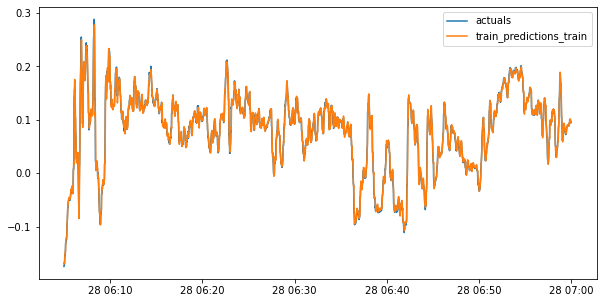

In [12]:
#-------------------------------------------------------------------
##For creating plot of train predictions vs train actuals  
xx=data.index
xx=pd.to_datetime(xx)
xx=pd.DataFrame(xx)

x_train_time=xx.iloc[:len(X_train)]

x_test_time=xx.iloc[len(X_train):len(X_train)+len(X_test)]


f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.plot(x_train_time,Y_train)
plt.plot(x_train_time,train_predictions)
plt.legend(['actuals','train_predictions_train'])

#for calculating R2 score for training dataset 
r2=r2_score(Y_train,train_predictions)
print('R2 score Performance:',r2)

#for calculating MSE for training dataset
mse_train=mean_squared_error(Y_train,train_predictions)
print('MSE_train:',mse_train)

#for calculating MAE for training dataset
mae_train=mean_absolute_error(Y_train,train_predictions)
print('MAE_train:',mae_train)

## Performance on Test data

In [13]:
#-------------------------------------------------------------------
#Prediction on test dataset
train_predictions_test=model.predict(X_test).flatten()

#dataframe for comparing test prediction values vs test actual values
train_results_test=pd.DataFrame(data={'Test Predictions':train_predictions_test,'Actuals':Y_test})

Error=train_results_test['Test Predictions']-train_results_test['Actuals'] #For calculating error values of test dataset
edf=pd.DataFrame(Error) #for creating dataframe with error values 
train_results_test=train_results_test+50  # for Descaling of predicted frequency values
train_results_test

57/57 [==============================] - 4s 77ms/step


,Test Predictions,Actuals
0,50.097252,50.095703
1,50.097054,50.096680
2,50.097439,50.094727
3,50.095985,50.092773
4,50.093613,50.092773
...,...,...
1795,50.117569,50.117188
1796,50.115532,50.117188
1797,50.115433,50.117188
1798,50.116226,50.105469


R2 score Performance: 0.995568328702822
MSE_test: 4.846064e-05
MAE_test: 0.0046423767


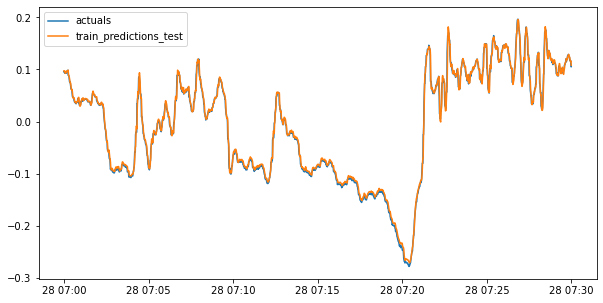

In [14]:
#-------------------------------------------------------------------
#plot for test dataset
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.plot(x_test_time,Y_test)
plt.plot(x_test_time,train_predictions_test)
plt.legend(['actuals','train_predictions_test'])

#for calculating R2 score on test dataset
r2_test=r2_score(Y_test,train_predictions_test)
print('R2 score Performance:',r2_test)
#for calculating MSE on test dataset
mse_test=mean_squared_error(Y_test,train_predictions_test)
print('MSE_test:',mse_test)
#for calculating MAE on test dataset
mae_test=mean_absolute_error(Y_test,train_predictions_test)
print('MAE_test:',mae_test)

## Plot of loss curve

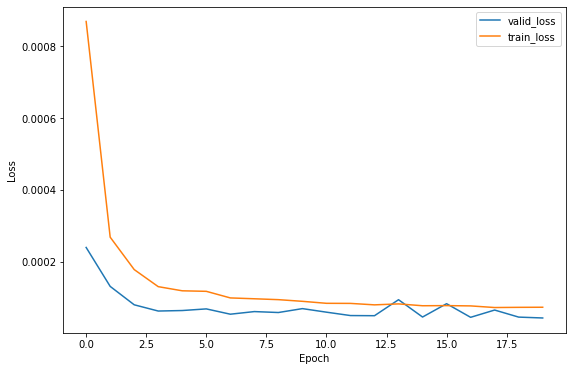

In [15]:
#-------------------------------------------------------------------
#To plot loss curve for training loss and validation loss
plt.subplots( 1, figsize= (9, 6))
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['valid_loss','train_loss'])

## Error plot  

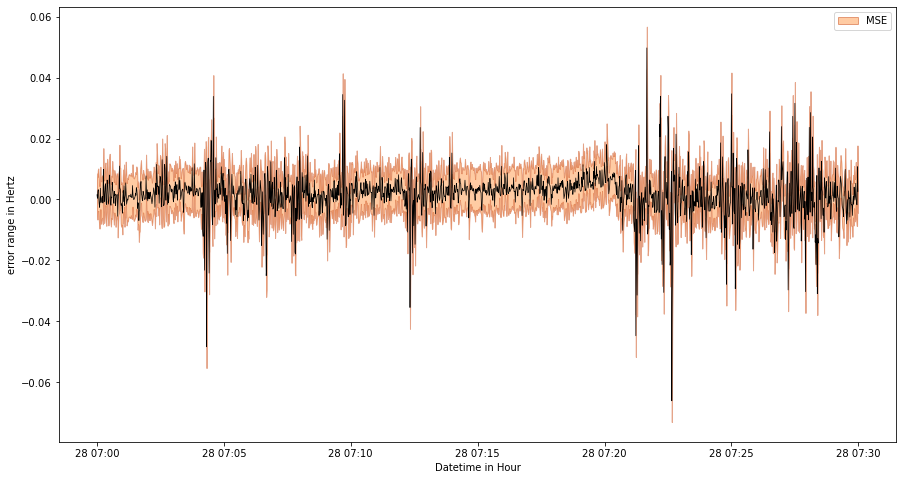

In [16]:
#-------------------------------------------------------------------
#For generating error plot for different prediction times  
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

plt.ylabel('error range in Hertz')
plt.xlabel('Datetime in Hour')
xxx=np.squeeze(x_test_time)
edf.index=xxx

l2 = plt.plot(x_test_time,Error, color='black',linewidth=0.7)

plt.fill_between(xxx,  Error-np.sqrt(mse_test), Error+np.sqrt(mse_test), alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848', label='MSE')

plt.legend()
plt.show()

## Error plot in 1 minute resolution

                            0
All Frequency Data           
2020-12-28 07:00:00  0.001547
2020-12-28 07:01:00 -0.004504
2020-12-28 07:02:00 -0.000466
2020-12-28 07:03:00 -0.000055
2020-12-28 07:04:00  0.001530
2020-12-28 07:05:00  0.006251
2020-12-28 07:06:00  0.004883
2020-12-28 07:07:00  0.004965
2020-12-28 07:08:00  0.012456
2020-12-28 07:09:00  0.000387
2020-12-28 07:10:00 -0.000402
2020-12-28 07:11:00  0.001880
2020-12-28 07:12:00  0.007118
2020-12-28 07:13:00  0.000008
2020-12-28 07:14:00  0.005270
2020-12-28 07:15:00  0.003615
2020-12-28 07:16:00  0.001605
2020-12-28 07:17:00  0.002745
2020-12-28 07:18:00  0.003116
2020-12-28 07:19:00  0.004534
2020-12-28 07:20:00  0.012121
2020-12-28 07:21:00  0.002362
2020-12-28 07:22:00  0.001651
2020-12-28 07:23:00 -0.005373
2020-12-28 07:24:00 -0.012590
2020-12-28 07:25:00  0.034674
2020-12-28 07:26:00  0.002411
2020-12-28 07:27:00  0.009380
2020-12-28 07:28:00 -0.000330
2020-12-28 07:29:00  0.005862


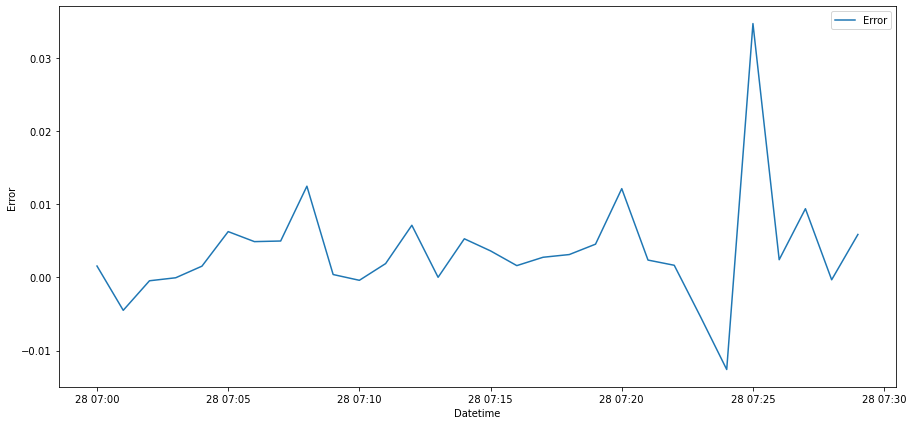

In [17]:
#-------------------------------------------------------------------
#For generating Error plot in 1 minute resolution
xedf=edf.resample('1min').first()
print(xedf)
plt.subplots(1,sharex='row',sharey='col', figsize= (15, 7))
#plt.plot(xedf)
plt.plot()
plt.plot(xedf,label='Error')
plt.xlabel('Datetime')
plt.ylabel('Error')

plt.legend()

## Combined plot of train,test and predictions 

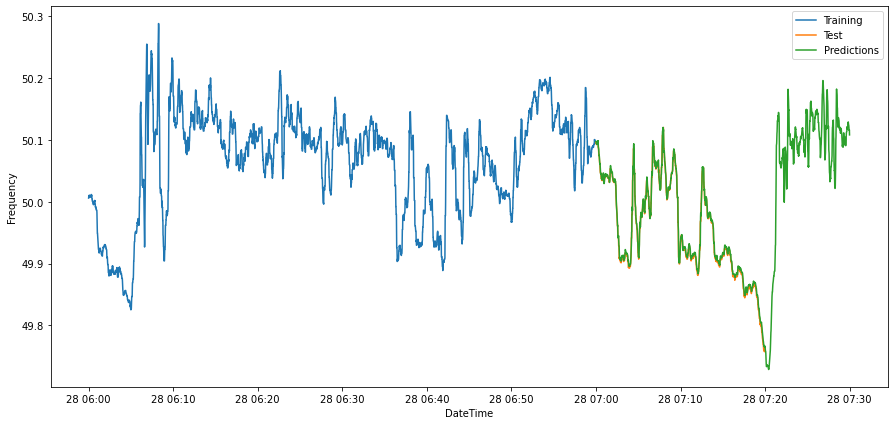

In [18]:
#-------------------------------------------------------------------
#####For generating combined plot of train test and predictions ######

plt.subplots( 1,sharex='row',sharey='col', figsize= (15, 7))
plt.xlabel('DateTime')
plt.ylabel('Frequency')

plt.plot(newdf['Frequency']+50,label='Training ')
plt.plot(testnewdf['Frequency']+50,label='Test ')
plt.plot(x_test_time,train_results_test['Test Predictions'],label='Predictions')
plt.legend()